# Section 7: Cámara Chilena de la Construcción

In [1]:
# Import Functions to create Json and images
from header_fun import *

# Naming Functions
def naming_image(x):
    return global_dir + "/img/" + init_data_name + x + '.png'

def naming_file(y):
    return global_dir + "/" + init_data_name + y + '.json'   

## Reading Data from API 
file='materiales.xlsx'
global_dir="./data"
norm=False# no normalizada
init_data_name="cchc_"
link_data = "https://drive.google.com/uc?export=download&id=1m7UrDeZJsl4eAcI2LQ_k7X-Vjb0noBKf"
link_img = "https://smartdata-demo.sfo2.digitaloceanspaces.com/data/img/"
link_glosario="https://smartdata-demo.sfo2.digitaloceanspaces.com/data/"
info_header=[ {"titulo":None,"Fuente":None, "LinkDatosOriginales":None, 
               "comment":None, "linkPlot":None,"glosario":None}] 

### 1) cchc_01_materiales.json 

set: None


<Figure size 432x288 with 0 Axes>

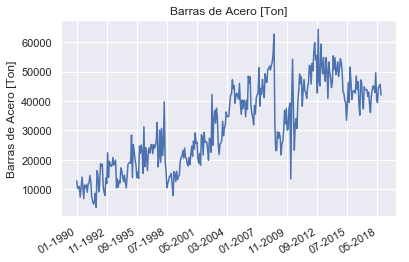

CREATED:  ./data/cchc_01_materiales.json


In [2]:
sheetname = 'Indice de Despacho Mat Const'
full_file_name = '01_materiales'
info_header[0]["titulo"] = "Índice de Despacho de Materiales de Construcción"
info_header[0]["Fuente"] = "CCHC"
info_header[0]["LinkDatosOriginales"] = link_data
info_header[0]["comment"] = "En el caso de Materiales generales para la Construcción éstos se refieren a datos mensuales de 9 empresas informantes, informes mensuales desde 1980, materiales como cemento, fierro, madera, vidrio, etc. La unidad son variadas y corresponden a normalización desde la Fuente. Fuente: CChC"
info_header[0]["linkPlot"] = link_img + init_data_name + full_file_name + ".png"
info_header[0]["glosario"] = ""

if sheetname == 'Indice de Despacho Mat Const':
    df = pd.read_excel(file, sheet_name=sheetname)
    varible_v = ["Tons. Barras de Acero para Hormigón",'Tons. Cemento',
                 'm3 Hormigón','Índ. Mensual despacho Mat construcc.']
    variable_meaning = ["Barras de Acero [Ton]",'Cemento [Ton]',
                 'Hormigón [m2]','Mat construcc. [ind]']
    reg_name = ["Barras de Acero",'Cemento',
                 'Hormigón','Mat construcc.']
    toolTip_v = [["% Var Acero prom acum",
                  "% Var Acero en 12 meses",
                  "Despacho Acero Acum. 12 meses (ton)"],
                 ['% Var Cemento mes',
                  '% Var Cemento en 12 meses',
                  'Despacho Cemento Acum. 12 meses (ton)'],
                 [ '% Var Hormigón mes',
                  '% Var Hormigón en 12 meses',
                  'Despacho Hormigón Acum. 12 meses (m3)'],
                 ['% Var Mat Const mes',
                  '% Var Mat Const en 12 meses',
                  'Despacho Mat Const Acum. 12 meses']]
    toolTip_mening =[["Var Mes", "var 12 meses", "despacho ac."],
                     ["Var Mes", "var 12 meses", "despacho ac."],
                     ["Var Mes", "var 12 meses", "despacho ac."],
                     ["Var Mes", "var 12 meses", "despacho ac."]]

    jsonDir = DataToJson(df, varible_v, variable_meaning,reg_name, toolTip_v, toolTip_mening)
    jsonDir = [info_header, jsonDir]
    jsonUTF8 = json.dumps(jsonDir, ensure_ascii=False).encode('utf8')
    jsonUTF8 = json.loads(jsonUTF8)    
    create_image(df, varible_v[0], variable_meaning[0],naming_image(full_file_name))
    name_file = naming_file(full_file_name)
    with open(name_file , 'w') as outfile:  
        json.dump(jsonUTF8, outfile,ensure_ascii=False)
    print("CREATED: ", name_file)      